In [1]:
import numpy as np
import pandas as pd
import random
import os
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import gaussian_kde
import warnings
import keras
from keras.models import Sequential
from keras import layers
from keras import activations

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1
### Question 1

In [2]:
X = pd.read_csv('../Project1/KV_periodic/X.csv')
Y = pd.read_csv('../Project1/KV_periodic/Y.csv')
print("The shape of X.csv is:")
print(X.shape)
print("The shape of Y.csv is:")
print(Y.shape)

The shape of X.csv is:
(28962, 1752)
The shape of Y.csv is:
(28962, 3)


<font color=blue size=3> Since X and Y both has a column for timestamp, therefore, the number of samples is 28962, the number of features is 1751, the number of types of targets is 2. </font>

In [ ]:
chosenFeatureID = random.sample(range(1752), 10) #choose 10 random featrues from 1751 features
print("The chosen features are:")
#print(chosenFeatureID)
chosenX = X.iloc[:, chosenFeatureID].copy() #the chosen features
for col in chosenX.columns:
    print(col)

The chosen features are:
4_X..swpused
2_eth1_rxdrop.s
1_cpu23_.sys
4_cpu12_.idle
0_i117_intr.s
1_cpu2_.idle
1_dev8.5_await
2_idisc6.s
1_i118_intr.s
4_i119_intr.s


<font color=blue size=3> By looking up the manual page:</font> <br>
<font color=blue size=3> 'usr' means the percentage of CPU utilization that occurred while executing at the user level (application). </font> <br>
<font color=blue size=3> 'sys' means the percentage of CPU utilization that occurred while executing at the system level (kernel).</font> <br>
<font color=blue size=3> 'rxkB' means the total number of kilobytes received per second.</font> <br>
<font color=blue size=3> 'iowait' means the percentage of time that the CPU or CPUs were idle during which the system had an outstanding disk I/O request.</font> <br>
<font color=blue size=3> 'idle' means the percentage of time that the CPU or CPUs were idle and the system did not have an outstanding disk I/O request. </font> <br>
<font color=blue size=3> 'retrans' means the number of RPC requests per second, those which needed to be retransmitted. </font> <br>
<font color=blue size=3> 'txkB' means the total number of kilobytes transmitted per second.</font> <br>

In [ ]:
pd.options.display.float_format = "{:,.2f}".format #set no more than two digits after the decimal point
allStatistics = pd.DataFrame(chosenX.describe(percentiles = [0.25,0.90]))
statistics  = allStatistics.iloc[[1,2,7,3,4,6], :].copy()
statistics

,4_X..swpused,2_eth1_rxdrop.s,1_cpu23_.sys,4_cpu12_.idle,0_i117_intr.s,1_cpu2_.idle,1_dev8.5_await,2_idisc6.s,1_i118_intr.s,4_i119_intr.s
mean,1.21,0.07,0.30,97.92,1.54,98.76,4.85,0.02,0.01,218.74
std,0.31,0.25,0.60,2.41,0.95,1.66,14.93,0.13,0.08,85.33
max,1.77,1.00,3.96,100.00,5.00,101.01,"1,218.18",1.00,2.00,727.00
min,0.86,0.00,0.00,0.00,0.00,46.60,0.00,0.00,0.00,0.00
25%,0.91,0.00,0.00,97.03,1.00,98.00,1.60,0.00,0.00,151.00
90%,1.72,0.00,1.01,100.00,3.00,100.00,9.14,0.00,0.00,332.00


<font color=blue size=3> With help of describe(), the required statistics are shown above.</font> <br>

### Question 2

In [3]:
#statisticsNum = np.around(statisticsNum, decimals=2) #round to two digits after the decimal point
numpyX = X.drop(['TimeStamp'], axis=1).copy() #remove timestamp
numpyX = numpyX.to_numpy()
#np.set_printoptions(precision=2) #set no more than two digits after the decimal point
numpyX

array([[2.230000e+00, 5.500000e-01, 4.200000e-01, ..., 2.960000e+02,
        1.216590e+05, 2.937120e+05],
       [3.480000e+00, 7.600000e-01, 1.510000e+00, ..., 3.487000e+03,
        1.603670e+06, 2.822663e+06],
       [5.400000e+00, 7.900000e-01, 5.360000e+00, ..., 2.755000e+03,
        1.272053e+06, 2.442247e+06],
       ...,
       [4.000000e-02, 8.000000e-02, 0.000000e+00, ..., 3.210000e+02,
        1.565630e+05, 2.891050e+05],
       [4.000000e-02, 8.000000e-02, 0.000000e+00, ..., 3.100000e+02,
        1.479080e+05, 2.842120e+05],
       [4.000000e-02, 4.000000e-02, 0.000000e+00, ..., 3.330000e+02,
        1.724420e+05, 2.755180e+05]])

##### (a) L2 Normalization

In [14]:
normedRowX= preprocessing.normalize(numpyX, norm='l2')
normedRowX

array([[7.69676654e-09, 1.89830565e-09, 1.44961522e-09, ...,
        1.02163359e-06, 4.19901758e-04, 1.01373663e-03],
       [1.19873115e-08, 2.61791861e-09, 5.20139093e-09, ...,
        1.20114240e-05, 5.52404940e-03, 9.72302896e-03],
       [1.86083603e-08, 2.72233419e-09, 1.84705206e-08, ...,
        9.49370974e-06, 4.38348528e-03, 8.41596520e-03],
       ...,
       [1.38095228e-10, 2.76190456e-10, 0.00000000e+00, ...,
        1.10821421e-06, 5.40515080e-04, 9.98100523e-04],
       [1.38095536e-10, 2.76191072e-10, 0.00000000e+00, ...,
        1.07024041e-06, 5.10635864e-04, 9.81210213e-04],
       [1.38094431e-10, 1.38094431e-10, 0.00000000e+00, ...,
        1.14963614e-06, 5.95331995e-04, 9.51187534e-04]])

In [7]:
#Verifycation of L2 norm
normCorrect = 1
for i in range(normedRowX.shape[0]):
    sums = 0
    for j in normedRowX[i]:
        sums += j**2
    sums = float("{:.4f}".format(sums))     
    if sums != 1:
        normCorrect = 0
if normCorrect:
    print("L2 norm in row is correct.")

L2 norm in row is correct.


In [4]:
normedColumnX = preprocessing.normalize(numpyX.T, norm='l2')
normedColumnX = normedColumnX.T
normedColumnX

array([[0.0210194 , 0.00907754, 0.00944102, ..., 0.00046718, 0.00039578,
        0.00050488],
       [0.03280157, 0.0125435 , 0.03394272, ..., 0.00550362, 0.00521708,
        0.00485209],
       [0.050899  , 0.01303864, 0.12048541, ..., 0.00434829, 0.00413826,
        0.00419817],
       ...,
       [0.00037703, 0.00132037, 0.        , ..., 0.00050664, 0.00050933,
        0.00049697],
       [0.00037703, 0.00132037, 0.        , ..., 0.00048928, 0.00048118,
        0.00048855],
       [0.00037703, 0.00066018, 0.        , ..., 0.00052558, 0.00056099,
        0.00047361]])

In [9]:
#Verifycation of L2 norm
normCorrect = 1
for j in range(normedColumnX.shape[1]):
    sums = 0
    for i in range(normedColumnX.shape[0]):
        sums += normedColumnX[i][j]**2
    sums = float("{:.4f}".format(sums))   
    if sums != 1:
        normCorrect = 0
if normCorrect:
    print("L2 norm in column is correct.")

L2 norm in column is correct.


##### (b) Restriction to Interval

In [16]:
def normalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [17]:
resRowX = np.zeros(numpyX.shape)
for i in range(numpyX.shape[0]):
    resRowX[i] = normalizeData(numpyX[i])
resRowX

array([[5.84383254e-05, 5.84132563e-05, 5.84113164e-05, ...,
        6.28219869e-05, 1.87381125e-03, 4.44120111e-03],
       [6.58279802e-05, 6.57873925e-05, 6.57985839e-05, ...,
        1.17808967e-04, 2.39956946e-02, 4.21854738e-02],
       [9.93530577e-05, 9.92842697e-05, 9.93524608e-05, ...,
        1.40381108e-04, 1.90801620e-02, 3.65411665e-02],
       ...,
       [4.48981704e-07, 4.49579549e-07, 4.48383859e-07, ...,
        5.24609115e-06, 2.34045912e-03, 4.32144890e-03],
       [9.57149591e-07, 9.57747435e-07, 9.56551746e-07, ...,
        5.58984926e-06, 2.21160742e-03, 4.24882350e-03],
       [8.37580672e-07, 8.37580672e-07, 8.36982828e-07, ...,
        5.81404143e-06, 2.57817614e-03, 4.11876260e-03]])

In [12]:
#Verifycation of [0,1] scaling
resCorrect = 1
for i in range(resRowX.shape[0]):
    for j in resRowX[i]:   
        if j<0 or j>1:
            resCorrect = 0
if resCorrect:
    print("[0,1] scaling in row is correct.")

[0,1] scaling in row is correct.


In [18]:
resColumnX = np.zeros(numpyX.T.shape)
for i in range(numpyX.T.shape[0]):
    resColumnX[i] = normalizeData(numpyX.T[i])
resColumnX = resColumnX.T
resColumnX

array([[0.11506708, 0.18272425, 0.0320122 , ..., 0.00775097, 0.01653088,
        0.00782261],
       [0.17956656, 0.25249169, 0.11509146, ..., 0.40667583, 0.39170616,
        0.35135498],
       [0.27863777, 0.26245847, 0.40853659, ..., 0.3151644 , 0.30775637,
        0.29967932],
       ...,
       [0.00206398, 0.02657807, 0.        , ..., 0.01087636, 0.02536693,
        0.0071968 ],
       [0.00206398, 0.02657807, 0.        , ..., 0.00950119, 0.02317589,
        0.00653213],
       [0.00206398, 0.01328904, 0.        , ..., 0.01237655, 0.02938674,
        0.00535114]])

In [14]:
#Verifycation of [0,1] scaling
resCorrect = 1
for i in range(resRowX.shape[0]):
    for j in resRowX[i]:   
        if j<0 or j>1:
            resCorrect = 0
if resCorrect:
    print("[0,1] scaling in column is correct.")

[0,1] scaling in column is correct.


##### (c) Standardization

In [4]:
stdRowX = np.zeros(numpyX.shape)
for i in range(numpyX.shape[0]):
    stdRowX[i] = preprocessing.scale(numpyX[i])
stdRowX

array([[-0.14757565, -0.14757589, -0.14757591, ..., -0.14753276,
        -0.1298149 , -0.10469678],
       [-0.15495775, -0.15495815, -0.15495804, ..., -0.15444964,
         0.07895409,  0.25675721],
       [-0.1533002 , -0.15330087, -0.15330021, ..., -0.15289908,
         0.0322686 ,  0.2029788 ],
       ...,
       [-0.14485998, -0.14485997, -0.14485998, ..., -0.14481312,
        -0.12200608, -0.10265858],
       [-0.144821  , -0.144821  , -0.14482101, ..., -0.14477576,
        -0.12323057, -0.10333399],
       [-0.14486899, -0.14486899, -0.144869  , ..., -0.14482039,
        -0.1196973 , -0.1046511 ]])

In [16]:
#Verifycation of standardizatio
stdCorrect = 1
for i in stdRowX:
    mean = float("{:.4f}".format(i.mean()))
    std = float("{:.4f}".format(i.std()))
    if mean != 0 or std != 1:
        stdCorrect = 0
if stdCorrect:
    print("L2 standardizatio in row is correct.")

L2 standardizatio in row is correct.


In [5]:
stdColumnX = np.zeros(numpyX.T.shape)
for i in range(numpyX.T.shape[0]):
    stdColumnX[i] = preprocessing.scale(numpyX.T[i])
stdColumnX = stdColumnX.T
stdColumnX

array([[ 3.68670472,  1.83315127,  1.33082725, ..., -1.56242283,
        -1.55914158, -1.4338984 ],
       [ 6.15623665,  3.63558832,  5.82039329, ...,  0.14334655,
         0.05312454, -0.04070709],
       [ 9.9494377 ,  3.89307932, 21.6780348 , ..., -0.24794872,
        -0.30763854, -0.25027709],
       ...,
       [-0.63991522, -2.20087449, -0.39909728, ..., -1.54905893,
        -1.52116984, -1.43643639],
       [-0.63991522, -2.20087449, -0.39909728, ..., -1.55493905,
        -1.53058553, -1.43913192],
       [-0.63991522, -2.54419583, -0.39909728, ..., -1.54264425,
        -1.50389522, -1.44392142]])

In [18]:
#Verifycation of standardizatio
stdCorrect = 1
for i in stdColumnX.T:
    mean = float("{:.4f}".format(i.mean()))
    std = float("{:.4f}".format(i.std()))
    if mean != 0 or std != 1:
        stdCorrect = 0
if stdCorrect:
    print("L2 standardizatio in column is correct.")

L2 standardizatio in column is correct.


# Task 2
### Question 2.1

In [5]:
# prepare train data
numpyY = Y.drop(['TimeStamp'], axis=1).copy().to_numpy() #remove timestamp
trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data

In [6]:
def calError(real, pred):
    errors = np.zeros([1,2])
    m = pred.T.shape[1]
    for i in range(pred.T.shape[0]):
        average = real.T[i].mean()
        sums = 0
        for j in range(m):
            sums += abs(real.T[i][j] - pred.T[i][j])
        errors[0][i] = sums / m / average
    return errors

##### Linear regression

In [42]:
regLinear = linear_model.Lasso(alpha=0.1)
regLinear.fit(trainX, trainY) #train model
predLinearY = regLinear.predict(testX) #predict Y

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34583.332863890064, tolerance: 21.3503917644261
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164453.01338476708, tolerance: 97.08632217685464
  positive)


<font color=blue size=3> Linear regression's accuracy is:</font> <br>

In [43]:
calError(testY, predLinearY)

array([[0.02308785, 0.02509718]])

##### Random forest regression

In [ ]:
regRF = RandomForestRegressor()
regRF.fit(trainX, trainY) #train model
predRFY = regRF.predict(testX) #predict Y

<font color=blue size=3> Random forest regression's accuracy is:</font> <br>

In [ ]:
calError(testY, predRFY)

array([[0.02094821, 0.02241047]])

#####  Neural network regression

In [21]:
model = Sequential()
model.add(layers.Dense(128,input_shape=(1751,),activation='sigmoid')) 
model.add(layers.Dense(64,activation='sigmoid'))
model.add(layers.Dense(32,activation='sigmoid'))
model.add(layers.Dense(2,activation='linear'))   
model.compile(loss='mse', optimizer=keras.optimizers.Adam(
    learning_rate=0.01))  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               224256    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 234,658
Trainable params: 234,658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainX, trainY)

634/634 [==============================] - 1s 1ms/step - loss: 17.1646


17.164579391479492

In [ ]:
predNNY = model.predict(testX)

<font color=blue size=3> Neural network's accuracy is:</font> <br>

In [ ]:
calError(testY, predNNY)

array([[0.02984006, 0.03133619]])

##### Naive method 

In [ ]:
predNaiveY = np.zeros(testY.shape)
predNaiveY.T[0].fill(trainY.T[0].mean())
predNaiveY.T[1].fill(trainY.T[1].mean())
predNaiveY

array([[ 55.98589821, 111.95361111],
       [ 55.98589821, 111.95361111],
       [ 55.98589821, 111.95361111],
       ...,
       [ 55.98589821, 111.95361111],
       [ 55.98589821, 111.95361111],
       [ 55.98589821, 111.95361111]])

<font color=blue size=3> Naive method 's accuracy is:</font> <br>

In [ ]:
calError(testY, predNaiveY)

array([[0.04346858, 0.04591663]])

##### For random forest model

In [ ]:
newX = X.drop(['TimeStamp'], axis=1).head(600).copy() #select plot datas
newY = Y.drop(['TimeStamp'], axis=1).head(600).copy()
timeStamp = np.arange(600)
newNumpyX =newX.to_numpy()
newNumpyY =newY.to_numpy()

In [ ]:
newPredNNY = regRF.predict(newNumpyX)
newPredNaiveY = predNaiveY[0:600, :]

##### Plot of Key Value 1 

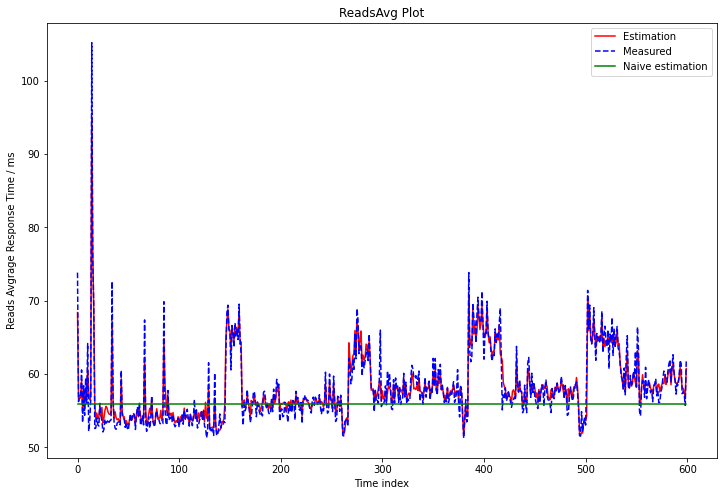

In [ ]:
figure(figsize=(12, 8))
plt.plot(timeStamp, newPredNNY.T[0], color='r', label = "Estimation")
plt.plot(timeStamp, newNumpyY.T[0], color='b', linestyle='dashed', label = "Measured")
plt.plot(timeStamp, newPredNaiveY.T[0], color='g', label = "Naive estimation")
plt.xlabel('Time index')
plt.ylabel('Reads Avgrage Response Time / ms')
plt.legend()
plt.title('ReadsAvg Plot')
plt.show()

##### Plot of Key Value 2

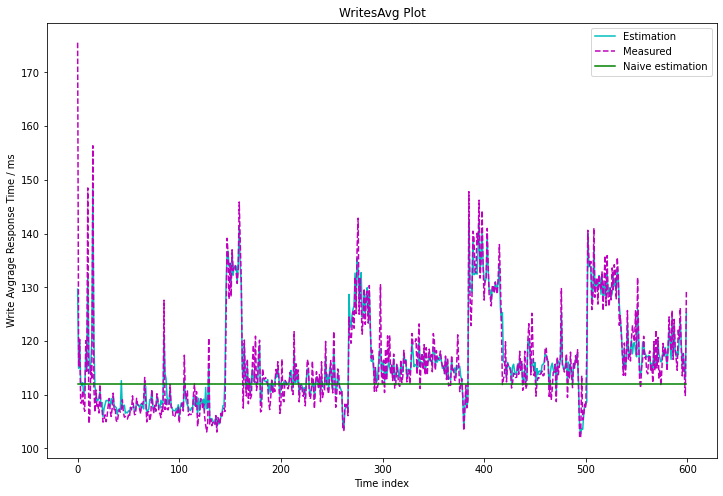

In [ ]:
figure(figsize=(12, 8))
plt.plot(timeStamp, newPredNNY.T[1], color='c', label = "Estimation")
plt.plot(timeStamp, newNumpyY.T[1], color='m', linestyle='dashed', label = "Measured")
plt.plot(timeStamp, newPredNaiveY.T[1], color='g', label = "Naive estimation")
plt.xlabel('Time index')
plt.ylabel('Write Avgrage Response Time / ms')
plt.legend()
plt.title('WritesAvg Plot')
plt.show()

##### Density Plot of Target Test Values

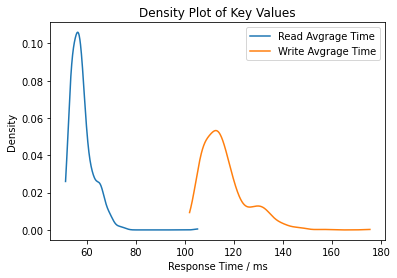

In [ ]:
density1 = gaussian_kde(newNumpyY.T[0])
density2 = gaussian_kde(newNumpyY.T[1])
scaleX1 = np.linspace(np.min(newNumpyY.T[0]), np.max(newNumpyY.T[0]), 600)
scaleX2 = np.linspace(np.min(newNumpyY.T[1]), np.max(newNumpyY.T[1]), 600)
plt.plot(scaleX1, density1(scaleX1), label = 'Read Avgrage Time')
plt.plot(scaleX2, density2(scaleX2), label = 'Write Avgrage Time')
plt.xlabel('Response Time / ms')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Key Values')
plt.show()

##### Histogram

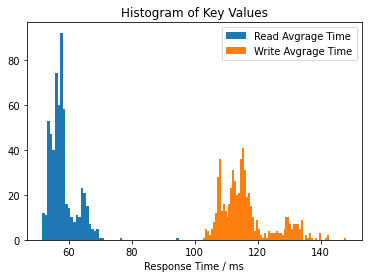

In [ ]:
plt.hist(newPredNNY.T[0], bins=int(np.max(newNumpyY.T[0])-np.min(newNumpyY.T[0])), label = 'Read Avgrage Time')
plt.hist(newPredNNY.T[1], bins=int(np.max(newNumpyY.T[1])-np.min(newNumpyY.T[1])), label = 'Write Avgrage Time')
plt.xlabel('Response Time / ms')
plt.legend()
plt.title('Histogram of Key Values')
plt.show()

##### Density Plot of Estimation Errors 

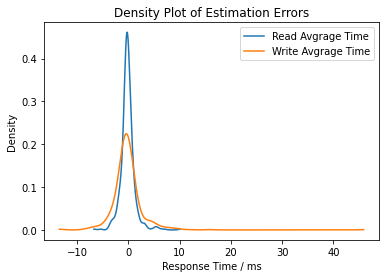

In [ ]:
error1 = newNumpyY.T[0] - newPredNNY.T[0]
error2 = newNumpyY.T[1] - newPredNNY.T[1]
density1 = gaussian_kde(error1)
density2 = gaussian_kde(error2)
scaleX1 = np.linspace(np.min(error1), np.max(error1), 600)
scaleX2 = np.linspace(np.min(error2), np.max(error2), 600)
plt.plot(scaleX1, density1(scaleX1), label = 'Read Avgrage Time')
plt.plot(scaleX2, density2(scaleX2), label = 'Write Avgrage Time')
plt.xlabel('Response Time / ms')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Estimation Errors')
plt.show()

### Question 2.2

In [ ]:
warnings.filterwarnings('ignore')

##### S1

In [ ]:
errorS1 = np.zeros([50,2])
for i in range(50):
    trainXS1, testXS1, trainYS1, testYS1 = train_test_split(numpyX, numpyY, train_size = 25, test_size = 1000, shuffle = True)
    linearS1 = linear_model.Lasso(alpha=0.1) 
    #linearS1 = LinearRegression()
    linearS1.fit(trainXS1, trainYS1) #train model
    linearS1Y = linearS1.predict(testXS1) #predict Y
    errorS1[i] = calError(testYS1, linearS1Y)

##### S2

In [ ]:
errorS2 = np.zeros([50,2])
for i in range(50):
    trainXS2, testXS2, trainYS2, testYS2 = train_test_split(numpyX, numpyY, train_size = 50, test_size = 1000, shuffle = True)
    linearS2 = linear_model.Lasso(alpha=0.1) 
    linearS2.fit(trainXS2, trainYS2) #train model
    linearS2Y = linearS2.predict(testXS2) #predict Y
    errorS2[i] = calError(testYS2, linearS2Y)

##### S3

In [ ]:
errorS3 = np.zeros([50,2])
for i in range(50):
    trainXS3, testXS3, trainYS3, testYS3 = train_test_split(numpyX, numpyY, train_size = 100, test_size = 1000, shuffle = True)
    linearS3 = linear_model.Lasso(alpha=0.1) 
    linearS3.fit(trainXS3, trainYS3) #train model
    linearS3Y = linearS3.predict(testXS3) #predict Y
    errorS3[i] = calError(testYS3, linearS3Y)

##### S4

In [ ]:
errorS4 = np.zeros([50,2])
for i in range(50):
    trainXS4, testXS4, trainYS4, testYS4 = train_test_split(numpyX, numpyY, train_size = 200, test_size = 1000, shuffle = True)
    linearS4 = linear_model.Lasso(alpha=0.1) 
    linearS4.fit(trainXS4, trainYS4) #train model
    linearS4Y = linearS4.predict(testXS4) #predict Y
    errorS4[i] = calError(testYS4, linearS4Y)

##### S5

In [ ]:
errorS5 = np.zeros([50,2])
for i in range(50):
    trainXS5, testXS5, trainYS5, testYS5 = train_test_split(numpyX, numpyY, train_size = 400, test_size = 1000, shuffle = True)
    linearS5 = linear_model.Lasso(alpha=0.1) 
    linearS5.fit(trainXS5, trainYS5) #train model
    linearS5Y = linearS5.predict(testXS5) #predict Y
    errorS5[i] = calError(testYS5, linearS5Y)

##### S6

In [ ]:
errorS6 = np.zeros([50,2])
for i in range(50):
    trainXS6, testXS6, trainYS6, testYS6 = train_test_split(numpyX, numpyY, train_size = 800, test_size = 1000, shuffle = True)
    linearS6 = linear_model.Lasso(alpha=0.1) 
    linearS6.fit(trainXS6, trainYS6) #train model
    linearS6Y = linearS6.predict(testXS6) #predict Y
    errorS6[i] = calError(testYS6, linearS6Y)

##### S7

In [ ]:
errorS7 = np.zeros([50,2])
for i in range(50):
    trainXS7, testXS7, trainYS7, testYS7 = train_test_split(numpyX, numpyY, train_size = 1600, test_size = 1000, shuffle = True)
    linearS7 = linear_model.Lasso(alpha=0.1) 
    linearS7.fit(trainXS7, trainYS7) #train model
    linearS7Y = linearS7.predict(testXS7) #predict Y
    errorS7[i] = calError(testYS7, linearS7Y)

##### S8

In [ ]:
errorS8 = np.zeros([50,2])
for i in range(50):
    trainXS8, testXS8, trainYS8, testYS8 = train_test_split(numpyX, numpyY, train_size = 3200, test_size = 1000, shuffle = True)
    linearS8 = linear_model.Lasso(alpha=0.1) 
    linearS8.fit(trainXS8, trainYS8) #train model
    linearS8Y = linearS8.predict(testXS8) #predict Y
    errorS8[i] = calError(testYS8, linearS8Y)

([<matplotlib.axis.XTick at 0x7fe67278f978>,
 [Text(0, 0, '25'),
  Text(0, 0, '50'),
  Text(0, 0, '100'),
  Text(0, 0, '200'),
  Text(0, 0, '400'),
  Text(0, 0, '800'),
  Text(0, 0, '1600'),
  Text(0, 0, '3200')])

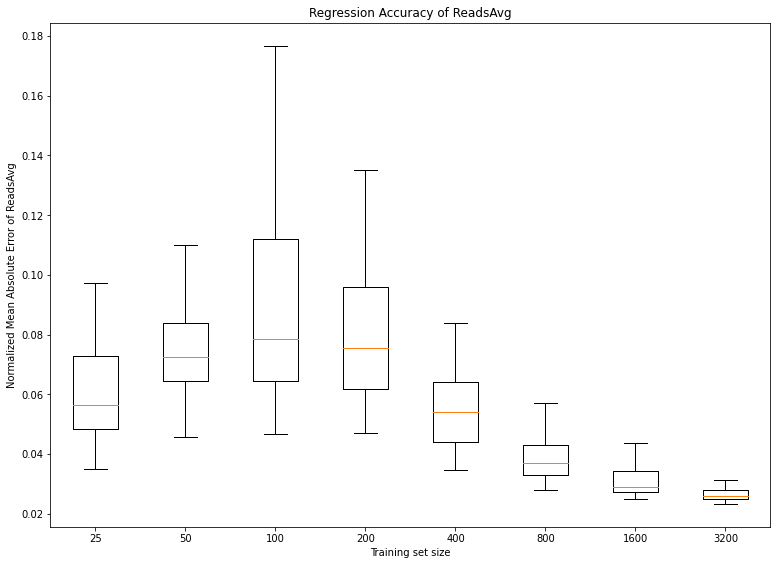

In [ ]:
boxData = [errorS1.T[0], errorS2.T[0], errorS3.T[0], errorS4.T[0], errorS5.T[0], errorS6.T[0], errorS7.T[0], errorS8.T[0]]
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1])
plt.xlabel("Training set size")
plt.ylabel("Normalized Mean Absolute Error of ReadsAvg") 
plt.title('Regression Accuracy of ReadsAvg')
ax.boxplot(boxData, showfliers = False)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['25', '50', '100', '200', '400', '800', '1600', '3200'])

# Task 3

##### Linear regression with L2 Normlization

In [19]:
trainNormedRowX, testNormedRowX, trainNormedRowY, testNormedRowY = train_test_split(normedRowX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data
regLinearNormedRow = linear_model.Lasso(alpha=0.1)
regLinearNormedRow.fit(trainNormedRowX, trainNormedRowY) #train model
predLinearNormedRowY = regLinearNormedRow.predict(testNormedRowX) #predict Y
calError(testNormedRowY, predLinearNormedRowY)

array([[0.04269372, 0.04488453]])

In [20]:
trainNormedColumnX, testNormedColumnX, trainNormedColumnY, testNormedColumnY = train_test_split(normedColumnX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data
regLinearNormedColumn = linear_model.Lasso(alpha=0.1)
regLinearNormedColumn.fit(trainNormedColumnX, trainNormedColumnY) #train model
predLinearNormedColumnY = regLinearNormedColumn.predict(testNormedColumnX) #predict Y
calError(testNormedColumnY, predLinearNormedColumnY)

array([[0.04393602, 0.04605761]])

##### Random Forest regression with L2 Normlization

In [ ]:
regRFNormedRow = RandomForestRegressor()
regRFNormedRow.fit(trainNormedRowX, trainNormedRowY) 
predRFNormedRowY = regRFNormedRow.predict(testNormedRowX) 
calError(testNormedRowY, predRFNormedRowY)

array([[0.02119296, 0.02246476]])

In [ ]:
regRFNormedColumn = RandomForestRegressor()
regRFNormedColumn.fit(trainNormedColumnX, trainNormedColumnY) 
predRFNormedColumnY = regRFNormedColumn.predict(testNormedColumnX) 
calError(testNormedColumnY, predRFNormedColumnY)

array([[0.02114556, 0.02241149]])

##### Neural network regression with L2 Normlization

In [32]:
model.fit(trainNormedRowX, trainNormedRowY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainNormedRowX, trainNormedRowY)
predNNNormedRowY = model.predict(testNormedRowX)
calError(testNormedRowY, predNNNormedRowY)

20273/20273 [==============================] - 1s 52us/step


array([[0.02500836, 0.02553266]])

In [33]:
model.fit(trainNormedColumnX, trainNormedColumnY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainNormedColumnX, trainNormedColumnY)
predNNNormedColumnY = model.predict(testNormedColumnX)
calError(testNormedColumnY, predNNNormedColumnY)

20273/20273 [==============================] - 1s 53us/step


array([[0.02448958, 0.02624106]])

# ---------------------------------------------------------------------------------------------------------------

##### Linear regression with Restriction to Interval

In [23]:
trainResRowX, testResRowX, trainResRowY, testResRowY = train_test_split(resRowX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data
regLinearResRow = linear_model.Lasso(alpha=0.1)
regLinearResRow.fit(trainResRowX, trainResRowY) #train model
predLinearResRowY = regLinearResRow.predict(testResRowX) #predict Y
calError(testResRowY, predLinearResRowY)

array([[0.04324015, 0.03885657]])

In [24]:
trainResColumnX, testResColumnX, trainResColumnY, testResColumnY = train_test_split(resColumnX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data
regLinearResColumn = linear_model.Lasso(alpha=0.1)
regLinearResColumn.fit(trainResColumnX, trainResColumnY) #train model
predLinearResColumnY = regLinearResColumn.predict(testResColumnX) #predict Y
calError(testResColumnY, predLinearResColumnY)

array([[0.02741666, 0.02792092]])

##### Random forest regression with Restriction to Interval

In [9]:
regRFResRow = RandomForestRegressor()
regRFResRow.fit(trainResRowX, trainResRowY) 
predRFResRowY = regRFResRow.predict(testResRowX) 
calError(testResRowY, predRFResRowY)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02304227, 0.02461528]])

In [12]:
regRFResColumn = RandomForestRegressor()
regRFResColumn.fit(trainResColumnX, trainResColumnY) 
predRFResColumnY = regRFResColumn.predict(testResColumnX)
calError(testResColumnY, predRFResColumnY)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02249411, 0.02384213]])

##### Neural network regression with Restriction to Interval

In [34]:
model.fit(trainResRowX, trainResRowY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainResRowX, trainResRowY)
predNNResRowY = model.predict(testResRowX)
calError(testResRowY, predNNResRowY)

20273/20273 [==============================] - 1s 52us/step


array([[0.02453405, 0.02526232]])

In [35]:
model.fit(trainResColumnX, trainResColumnY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainResColumnX, trainResColumnY)
predNNResColumnY = model.predict(testResColumnX)
calError(testResColumnY, predNNResColumnY)

20273/20273 [==============================] - 1s 51us/step


array([[0.02337533, 0.024789  ]])

# ---------------------------------------------------------------------------------------------------------------

##### Linear regression with Standardization

In [28]:
trainStdRowX, testStdRowX, trainStdRowY, testStdRowY = train_test_split(stdRowX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data
regLinearStdRow = linear_model.Lasso(alpha=0.1)
regLinearStdRow.fit(trainStdRowX, trainStdRowY) #train model
predLinearStdRowY = regLinearStdRow.predict(testStdRowX) #predict Y
calError(testStdRowY, predLinearStdRowY)

array([[0.02729743, 0.02861708]])

In [29]:
trainStdColumnX, testStdColumnX, trainStdColumnY, testStdColumnY = train_test_split(stdColumnX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data
regLinearStdColumn = linear_model.Lasso(alpha=0.1)
regLinearStdColumn.fit(trainStdColumnX, trainStdColumnY) #train model
predLinearStdColumnY = regLinearStdColumn.predict(testStdColumnX) #predict Y
calError(testStdColumnY, predLinearStdColumnY)

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.62911679444369, tolerance: 104.46367030425012
  positive)


array([[0.02430381, 0.02548407]])

##### Random forest regression with Standardization

In [30]:
regRFStdRow = RandomForestRegressor()
regRFStdRow.fit(trainStdRowX, trainStdRowY) 
predRFStdRowY = regRFStdRow.predict(testStdRowX) 
calError(testStdRowY, predRFStdRowY)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02486032, 0.02687601]])

In [31]:
regRFStdColumn = RandomForestRegressor()
regRFStdColumn.fit(trainStdColumnX, trainStdColumnY) #train model
predRFStdColumnY = regRFStdColumn.predict(testStdColumnX) #predict Y
calError(testStdColumnY, predRFStdColumnY)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02228449, 0.02369961]])

##### Neural network regression with Standardization

In [36]:
model.fit(trainStdRowX, trainStdRowY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainStdRowX, trainStdRowY)
predNNStdRowY = model.predict(testStdRowX)
calError(testStdRowY, predNNStdRowY)

20273/20273 [==============================] - 1s 49us/step


array([[0.02894911, 0.03121109]])

In [37]:
model.fit(trainStdColumnX, trainStdColumnY, epochs=100, batch_size=50, verbose=0, validation_split=0.1) 
model.evaluate(trainStdColumnX, trainStdColumnY)
predNNStdColumnY = model.predict(testStdColumnX)
calError(testStdColumnY, predNNStdColumnY)

20273/20273 [==============================] - ETA:  - 1s 50us/step


array([[0.02485137, 0.02601571]])

# ---------------------------------------------------------------------------------------------------------------

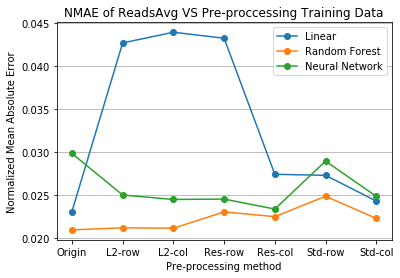

In [13]:
linearReadsAvg = [0.02308785,0.04269372,0.04393602,0.04324015,0.02741666,0.02729743,0.02430381]
rfReadsAvg = [0.02094821,0.02119296,0.02114556,0.02304227,0.02249411,0.02486032,0.02228449]
nnReadsAvg = [0.02984006,0.02500836,0.02448958,0.02453405,0.02337533,0.02894911,0.02485137]
names = ['Origin', 'L2-row', 'L2-col', 'Res-row', 'Res-col', 'Std-row', 'Std-col']
plt.plot(names, linearReadsAvg, '-o', label = 'Linear')
plt.plot(names, rfReadsAvg, '-o', label = 'Random Forest')
plt.plot(names, nnReadsAvg, '-o', label = 'Neural Network')
plt.xlabel('Pre-processing method')
plt.ylabel('Normalized Mean Absolute Error')
plt.legend()
plt.title('NMAE of ReadsAvg VS Pre-proccessing Training Data')
plt.grid()
plt.grid(axis='x')
plt.show()

##### Outlier Removal

In [8]:
listDelete =[[] for e in range(10)]
thresholdT = [10,20,30,40,50,60,70,80,90,100]
for T in range(10):
    for i in range(stdColumnX.shape[0]):
        if abs(np.max(stdColumnX[i])) > thresholdT[T] or abs(np.min(stdColumnX[i])) > thresholdT[T]:
            listDelete[T].append(i)

In [58]:
trainXT10 = np.delete(stdColumnX, listDelete[0], 0)
trainYT10 = np.delete(numpyY, listDelete[0], 0)
trainT10X, testT10X, trainT10Y, testT10Y = train_test_split(trainXT10, trainYT10, train_size = 0.7, shuffle = True)
regRFT10 = RandomForestRegressor()
regRFT10.fit(trainT10X, trainT10Y) #train model
predRFT10Y = regRFT10.predict(testT10X) #predict Y
calError(testT10Y, predRFT10Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02054678, 0.02121958]])

In [11]:
trainXT20 = np.delete(stdColumnX, listDelete[1], 0)
trainYT20 = np.delete(numpyY, listDelete[1], 0)
trainT20X, testT20X, trainT20Y, testT20Y = train_test_split(trainXT20, trainYT20, train_size = 0.7, shuffle = True)
regRFT20 = RandomForestRegressor()
regRFT20.fit(trainT20X, trainT20Y) #train model
predRFT20Y = regRFT20.predict(testT20X) #predict Y
calError(testT20Y, predRFT20Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.0211288, 0.0221392]])

In [12]:
trainXT30 = np.delete(stdColumnX, listDelete[2], 0)
trainYT30 = np.delete(numpyY, listDelete[2], 0)
trainT30X, testT30X, trainT30Y, testT30Y = train_test_split(trainXT30, trainYT30, train_size = 0.7, shuffle = True)
regRFT30 = RandomForestRegressor()
regRFT30.fit(trainT30X, trainT30Y) #train model
predRFT30Y = regRFT30.predict(testT30X) #predict Y
calError(testT30Y, predRFT30Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02148389, 0.02268482]])

In [13]:
trainXT40 = np.delete(stdColumnX, listDelete[3], 0)
trainYT40 = np.delete(numpyY, listDelete[3], 0)
trainT40X, testT40X, trainT40Y, testT40Y = train_test_split(trainXT40, trainYT40, train_size = 0.7, shuffle = True)
regRFT40 = RandomForestRegressor()
regRFT40.fit(trainT40X, trainT40Y) #train model
predRFT40Y = regRFT40.predict(testT40X) #predict Y
calError(testT40Y, predRFT40Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02181067, 0.02290507]])

In [14]:
trainXT50 = np.delete(stdColumnX, listDelete[4], 0)
trainYT50 = np.delete(numpyY, listDelete[4], 0)
trainT50X, testT50X, trainT50Y, testT50Y = train_test_split(trainXT50, trainYT50, train_size = 0.7, shuffle = True)
regRFT50 = RandomForestRegressor()
regRFT50.fit(trainT50X, trainT50Y) #train model
predRFT50Y = regRFT50.predict(testT50X) #predict Y
calError(testT50Y, predRFT50Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02178788, 0.02293523]])

In [15]:
trainXT60 = np.delete(stdColumnX, listDelete[5], 0)
trainYT60 = np.delete(numpyY, listDelete[5], 0)
trainT60X, testT60X, trainT60Y, testT60Y = train_test_split(trainXT60, trainYT60, train_size = 0.7, shuffle = True)
regRFT60 = RandomForestRegressor()
regRFT60.fit(trainT60X, trainT60Y) #train model
predRFT60Y = regRFT60.predict(testT60X) #predict Y
calError(testT60Y, predRFT60Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02176398, 0.02305089]])

In [16]:
trainXT70 = np.delete(stdColumnX, listDelete[6], 0)
trainYT70 = np.delete(numpyY, listDelete[6], 0)
trainT70X, testT70X, trainT70Y, testT70Y = train_test_split(trainXT70, trainYT70, train_size = 0.7, shuffle = True)
regRFT70 = RandomForestRegressor()
regRFT70.fit(trainT70X, trainT70Y) #train model
predRFT70Y = regRFT70.predict(testT70X) #predict Y
calError(testT70Y, predRFT70Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.0221438, 0.0231861]])

In [17]:
trainXT80 = np.delete(stdColumnX, listDelete[7], 0)
trainYT80 = np.delete(numpyY, listDelete[7], 0)
trainT80X, testT80X, trainT80Y, testT80Y = train_test_split(trainXT80, trainYT80, train_size = 0.7, shuffle = True)
regRFT80 = RandomForestRegressor()
regRFT80.fit(trainT80X, trainT80Y) #train model
predRFT80Y = regRFT80.predict(testT80X) #predict Y
calError(testT80Y, predRFT80Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02200825, 0.02347046]])

In [9]:
trainXT90 = np.delete(stdColumnX, listDelete[8], 0)
trainYT90 = np.delete(numpyY, listDelete[8], 0)
trainT90X, testT90X, trainT90Y, testT90Y = train_test_split(trainXT90, trainYT90, train_size = 0.7, shuffle = True)
regRFT90 = RandomForestRegressor()
regRFT90.fit(trainT90X, trainT90Y) #train model
predRFT90Y = regRFT90.predict(testT90X) #predict Y
calError(testT90Y, predRFT90Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02187422, 0.02294815]])

In [10]:
trainXT100 = np.delete(stdColumnX, listDelete[9], 0)
trainYT100 = np.delete(numpyY, listDelete[9], 0)
trainT100X, testT100X, trainT100Y, testT100Y = train_test_split(trainXT100, trainYT100, train_size = 0.7, shuffle = True)
regRFT100 = RandomForestRegressor()
regRFT100.fit(trainT100X, trainT100Y) #train model
predRFT100Y = regRFT100.predict(testT100X) #predict Y
calError(testT100Y, predRFT100Y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.02202474, 0.0235048 ]])

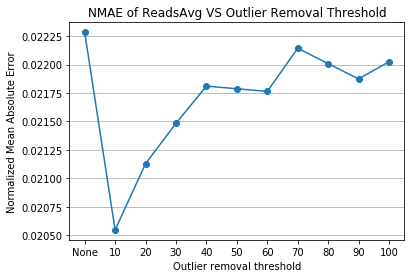

In [12]:
outlierResults = [0.02228449, 0.02054678, 0.0211288, 0.02148389, 0.02181067, 0.02178788, 0.02176398, 0.0221438, 0.02200825, 0.02187422, 0.02202474]
names = ['None', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
plt.plot(names, outlierResults, '-o')
plt.xlabel('Outlier removal threshold')
plt.ylabel('Normalized Mean Absolute Error')
plt.title('NMAE of ReadsAvg VS Outlier Removal Threshold')
plt.grid()
plt.grid(axis='x')
plt.show()

# Task 4

##### ReadsAvg

In [53]:
# L2 normalization in samples is used
listDelete =[]
thresholdNew = 0.418
for i in range(normedColumnX.shape[0]):
    if abs(np.max(normedColumnX[i])) > thresholdNew or abs(np.min(normedColumnX[i])) > thresholdNew:
        listDelete.append(i)

In [54]:
len(listDelete) / normedColumnX.shape[0] # outliers account for 1% of the whole data 

0.01001312064083972

In [62]:
dataSetX = np.delete(normedColumnX, listDelete, 0)
dataSetY = np.delete(numpyY, listDelete, 0)
trainClassX, testClassX, trainClassY, testClassY = train_test_split(dataSetX, dataSetY, train_size = 0.7, random_state = 20) 

In [63]:
maxY = np.max(trainClassY.T[0])
minY = np.min(trainClassY.T[0])
countY = np.zeros((1,20))
for item in trainClassY.T[0]:
    i = (item - minY) // ((maxY - minY)/20)
    if i > 19:
        i = 19 #The upper bundary of each interval is not in the bin, except the last one.
    countY[0][int(i)] += 1
#Verify the amount in each bin

In [64]:
countY[0][1]

8066.0

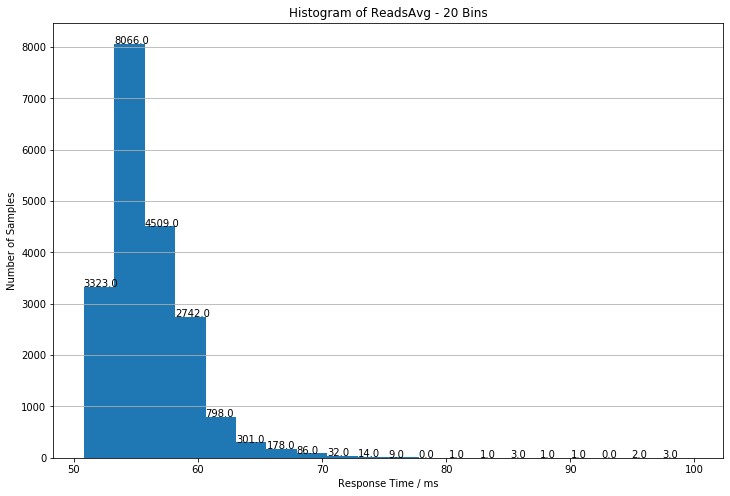

In [306]:
your_bins=20
data=trainClassY.T[0]
fig = plt.figure(figsize =(12, 8)) 
plt.xlabel('Response Time / ms')
plt.ylabel('Number of Samples')
plt.title('Histogram of ReadsAvg - 20 Bins')
plt.grid()
plt.grid(axis='x')
arr=plt.hist(data,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

In [66]:
trainLabelY = np.zeros((trainClassY.shape[0],1))
testLabelY = np.zeros((testClassY.shape[0],1))
for seq in range(trainClassY.shape[0]):
    i = (trainClassY[seq][0] - minY) // ((maxY - minY)/20)
    trainLabelY[seq][0] = int(i) 
for seq in range(testClassY.shape[0]):
    i = (testClassY[seq][0]- minY) // ((maxY - minY)/20)
    testLabelY[seq][0] = int(i) 

In [67]:
avgValue = []
for i in range(20):
    avgValue.append(minY + (maxY - minY) / 20 / 2 + i * (maxY - minY) / 20)
avgValue

[52.0183725,
 54.4707175,
 56.9230625,
 59.3754075,
 61.8277525,
 64.2800975,
 66.7324425,
 69.1847875,
 71.6371325,
 74.0894775,
 76.5418225,
 78.9941675,
 81.4465125,
 83.89885749999999,
 86.3512025,
 88.8035475,
 91.2558925,
 93.7082375,
 96.1605825,
 98.6129275]

In [70]:
# Check which bins has no input samples
flags= np.zeros((1,20))
for i in trainLabelY:
    flags[0][int(i)] = 1
print("Unused bins are:")
for j in range(20):
    if flags[0][j] == 0:
        print(j)

Unused bins are:
11
17


In [71]:
trainLabelY = np.ravel(trainLabelY)
trainLabelY

array([1., 1., 2., ..., 1., 3., 0.])

In [72]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25)
clf.fit(trainClassX, trainLabelY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
predicted_prob = clf.predict_proba(testClassX)
predicted_class = clf.predict(testClassX)

In [74]:
predicted_prob.shape

(8602, 18)

In [75]:
for i in range(1000):
    if predicted_class[i] > 5:
        print(i)

0
5
148
197
373
377
384
480
497
569
769
810
847
866


In [289]:
hist1 = np.ravel(predicted_prob[197]).tolist()
hist1.insert(11,0.0)
hist1.insert(17,0.0)
hist1

[0.0,
 0.0,
 0.02,
 0.06,
 0.14,
 0.3,
 0.33,
 0.07,
 0.04,
 0.02,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0]

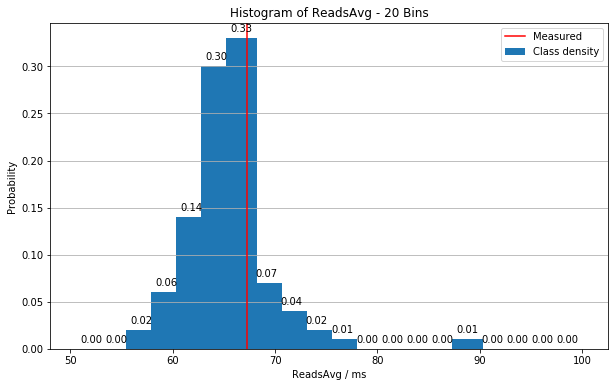

In [308]:
fig = plt.figure(figsize =(10, 6)) 
plt.axvline(testClassY.T[0][197],color='r', label = 'Measured') 
bins = [round(item, 2) for item in avgValue] 
binDensity  = hist1
plt.bar(bins, binDensity, width=3, label = 'Class density')
plt.xlabel('ReadsAvg / ms')
plt.ylabel('Probability')
plt.title('Histogram of ReadsAvg - 20 Bins')
plt.grid()
plt.legend()
plt.grid(axis='x')
for a,b in zip(bins, binDensity):
    plt.text(a, b+0.005, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)   
plt.show()

In [303]:
hist2 = np.ravel(predicted_prob[167]).tolist()
hist2.insert(11,0.0)
hist2.insert(17,0.0)
hist2

[0.08257063816047755,
 0.4899273493839908,
 0.3450218827431235,
 0.0524408112327227,
 0.02003931847968545,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

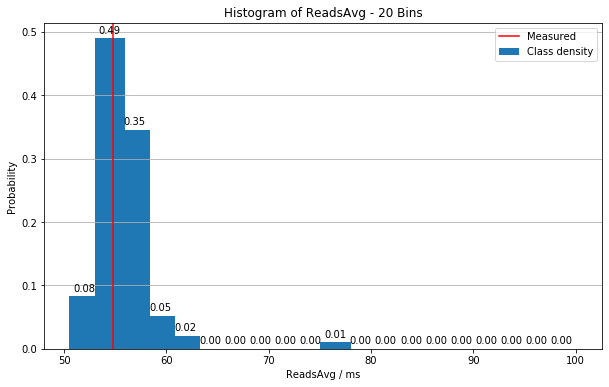

In [309]:
fig = plt.figure(figsize =(10, 6)) 
plt.axvline(testClassY.T[0][167],color='r', label = 'Measured') 
bins = [round(item, 2) for item in avgValue] 
binDensity  = hist2
plt.bar(bins, binDensity, width=3, label = 'Class density')
plt.xlabel('ReadsAvg / ms')
plt.ylabel('Probability')
plt.title('Histogram of ReadsAvg - 20 Bins')
plt.grid()
plt.legend()
plt.grid(axis='x')
for a,b in zip(bins, binDensity):
    plt.text(a, b+0.005, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)   
plt.show()

In [80]:
usedBins = list(filter(lambda x : x!= 11  and x!= 17 , np.arange(20))) #used bins
expPredY = np.zeros((predicted_class.shape[0],2))
for i in range(predicted_prob.shape[0]):
    for j in range(len(usedBins)):
        expPredY[i][0] += avgValue[usedBins[j]] * predicted_prob[i][j]

In [81]:
print("NMAE of ReadsAvg is:")
calError(testClassY, expPredY)[0][0]

NMAE of ReadsAvg is:


0.021382983493774026

##### WritesAvg

In [72]:
maxY1 = np.max(trainClassY.T[1])
minY1 = np.min(trainClassY.T[1])
countY1 = np.zeros((1,20))
for item in trainClassY.T[1]:
    i = (item - minY1) // ((maxY1 - minY1)/20)
    if i > 19:
        i = 19 #The upper bundary of each interval is not in the bin, except the last one.
    countY1[0][int(i)] += 1
#Verify the amount in each bin

In [87]:
countY1[0][0]

12487.0

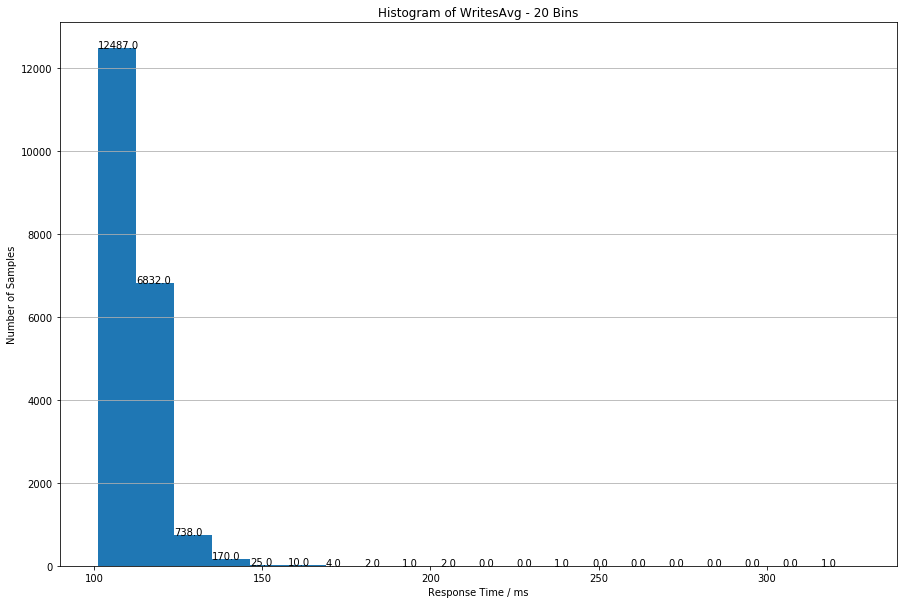

In [90]:
your_bins=20
data=trainClassY.T[1]
fig = plt.figure(figsize =(15, 10)) 
plt.xlabel('Response Time / ms')
plt.ylabel('Number of Samples')
plt.title('Histogram of WritesAvg - 20 Bins')
plt.grid()
plt.grid(axis='x')
arr=plt.hist(data,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

# Task 5

In [257]:
print("20th percentile of target Y on the training set: ",
       np.round(np.percentile(trainClassY.T[0], 20), 3))
print("50th percentile of target Y on the training set: ", 
       np.round(np.percentile(trainClassY.T[0], 50), 3))
print("95th percentile of target Y on the training set: ",
       np.round(np.percentile(trainClassY.T[0], 95), 3))

20th percentile of target Y on the training set:  53.438
50th percentile of target Y on the training set:  55.156
95th percentile of target Y on the training set:  61.533


In [258]:
Y.iloc[[0]]

,TimeStamp,ReadsAvg,WritesAvg
0,2016-11-20 07:13:51,73.8254,175.5445


In [259]:
# find the samples within first 1 hour
for i in range(3600):
    if str(Y.iloc[[i]]['TimeStamp'])[8:24] == '2016-11-20 08:13':
        if int(str(Y.iloc[[i]]['TimeStamp'])[25:27]) == 51:
            print('The last sample index is:', i)
            break
        elif int(str(Y.iloc[[i]]['TimeStamp'])[25:27]) > 51:
            print('The last sample index is:', i-1)
            break

The last sample index is: 2277


In [260]:
predicted1HProb = clf.predict_proba(normedColumnX[0:2278])

In [261]:
startValue = []
for item in avgValue:
    startValue.append(round(item - (maxY - minY) / 20 / 2, 3))
startValue

[50.792,
 53.245,
 55.697,
 58.149,
 60.602,
 63.054,
 65.506,
 67.959,
 70.411,
 72.863,
 75.316,
 77.768,
 80.22,
 82.673,
 85.125,
 87.577,
 90.03,
 92.482,
 94.934,
 97.387]

In [262]:
def calPercentile(startValue, probs, per):
    sumProb = 0
    flag = 0
    returnValue = 0
    for i in range(20):
        if flag == 1:
            break
        if sumProb + probs[i] < per:
            sumProb += probs[i]
        elif sumProb + probs[i] >= per:
            returnValue = startValue[i] + (per - sumProb) / probs[i] * (startValue[i+1] - startValue[i])
            flag = 1
    return returnValue        

In [263]:
per20th = []
per50th = []
per95th = []
for i in range(predicted1HProb.shape[0]):
    newHist = np.ravel(predicted1HProb[i]).tolist()
    newHist.insert(11,0.0)
    newHist.insert(17,0.0)
    per20th.append(calPercentile(startValue, newHist, 0.20))
    per50th.append(calPercentile(startValue, newHist, 0.50))
    per95th.append(calPercentile(startValue, newHist, 0.95))

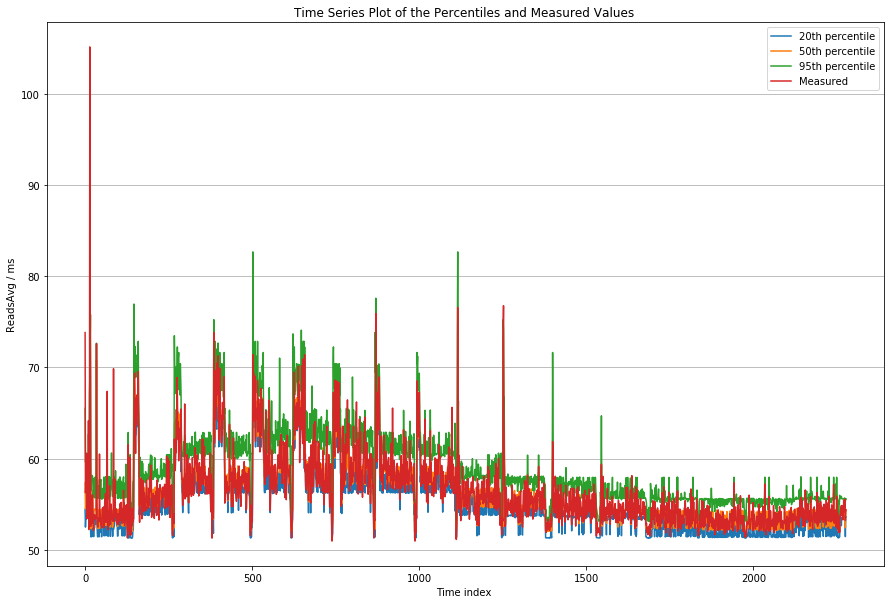

In [273]:
timeIndex = np.arange(2278)
fig = plt.figure(figsize =(15, 10)) 
plt.plot(timeIndex, np.ravel(per20th), label = '20th percentile')
plt.plot(timeIndex, np.ravel(per50th), label = '50th percentile')
plt.plot(timeIndex, np.ravel(per95th), label = '95th percentile')
plt.plot(timeIndex, numpyY.T[0][0:2278], label = 'Measured')
plt.xlabel('Time index ')
plt.ylabel('ReadsAvg / ms')
plt.legend()
plt.title('Time Series Plot of the Percentiles and Measured Values ')
plt.grid()
plt.grid(axis='x')
plt.show()

In [274]:
def calPerAccuracy(perPred, sampleY):
    length = len(perPred)
    sumSmaller = 0
    for i in range(length):
        if sampleY[i] <= perPred[i]:
            sumSmaller += 1
    return(np.round(sumSmaller/length,5))        

In [275]:
print("{:.3%}".format(calPerAccuracy(per20th, numpyY.T[0][0:2278])), ' of targets are smaller than the predicted 20th percentile.')
print("{:.3%}".format(calPerAccuracy(per50th, numpyY.T[0][0:2278])), ' of targets are smaller than the predicted 50th percentile.')
print("{:.3%}".format(calPerAccuracy(per95th, numpyY.T[0][0:2278])), ' of targets are smaller than the predicted 95th percentile.')

8.428%  of targets are smaller than the predicted 20th percentile.
51.624%  of targets are smaller than the predicted 50th percentile.
98.551%  of targets are smaller than the predicted 95th percentile.
